In [ ]:
! ffmpeg -i ../data/raw/Home.m4a ../data/raw/Brian.wav

In [21]:
import pandas as pd
import os
import sys
import argparse
import pandas as pd
sys.path.insert(0,'D://Repos/diurisation-pet-proj/')
# gpu configuration
import matplotlib.pyplot as plt
import src.vggvoxvlad.model as model
import src.tool.toolkits as toolkits
import src.vggvoxvlad.utils as ut
import numpy as np

vc_df = pd.read_csv('../data/raw/vox1_meta.txt',sep = '\t',skiprows=0)

params = {'dim': (257, None, 1),
              'nfft': 512,
              'spec_len': 250,
              'win_length': 400,
              'hop_length': 160,
              'n_classes': 1251,
              'sampling_rate': 16000,
              'normalize': True,
              }
args=[]

parser = argparse.ArgumentParser()
# set up training configuration.
parser.add_argument('--gpu', default='', type=str)
parser.add_argument('--resume', default=r'pretrained/weights.h5', type=str)
parser.add_argument('--data_path', default='4persons', type=str)
# set up network configuration.
parser.add_argument('--net', default='resnet34s', choices=['resnet34s', 'resnet34l'], type=str)
parser.add_argument('--ghost_cluster', default=2, type=int)
parser.add_argument('--vlad_cluster', default=8, type=int)
parser.add_argument('--bottleneck_dim', default=512, type=int)
parser.add_argument('--aggregation_mode', default='gvlad', choices=['avg', 'vlad', 'gvlad'], type=str)
# set up learning rate, training loss and optimizer.
parser.add_argument('--loss', default='softmax', choices=['softmax', 'amsoftmax'], type=str)
parser.add_argument('--test_type', default='normal', choices=['normal', 'hard', 'extend'], type=str)

args = parser.parse_args(args=[])
toolkits.initialize_GPU(args)

network_eval = model.vggvox_resnet2d_icassp(input_dim=params['dim'],
                                                num_class=params['n_classes'],
                                                mode='eval', args=args)
network_eval.load_weights('../models/vggvox/weights-09-0.923.h5', by_name=True)


In [23]:
vc_df['class'] = pd.to_numeric(vc_df['VoxCeleb1 ID'].str.replace('id','')) - 10001

[[804 251 971 ... 549 204 364]]
      VoxCeleb1 ID            VGGFace1 ID Gender Nationality  Set
class                                                            
804        id10805        Michael_Cudlitz      m         USA  dev
251        id10252            Donna_Mills      f         USA  dev
971        id10972  Richard_Dean_Anderson      m         USA  dev
752        id10753            Mark_Harmon      m         USA  dev
640        id10641            Kevin_Bacon      m         USA  dev


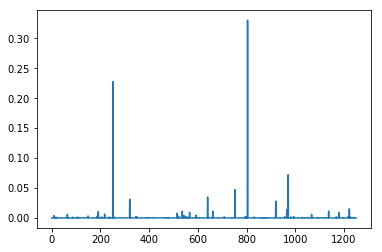

In [47]:
ID  = r'../data/raw/volo.wav'
specs = ut.load_data(ID, win_length=params['win_length'], sr=params['sampling_rate'],
                         hop_length=params['hop_length'], n_fft=params['nfft'],
                         spec_len=params['spec_len'], mode='eval')
specs = np.expand_dims(np.expand_dims(specs, 0), -1)

v = network_eval.predict(specs)
plt.plot(v[0,:]);
classes = (-v).argsort()
print(classes)
vc_topn = vc_df.set_index('class').loc[classes[0,:n]]
print(vc_topn)

array([[1116,  934,  402, ...,  784,  403,  888]], dtype=int64)

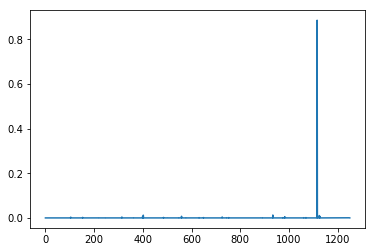

,VoxCeleb1 ID,VGGFace1 ID,Gender,Nationality,Set
class,,,,,
1116,id11117,Steve_Carell,m,USA,dev
934,id10935,Peter_Jackson,m,New Zealand,dev
402,id10403,Jack_Lemmon,m,USA,dev
1125,id11126,Steven_Yeun,m,USA,dev
559,id10560,Joseph_Gordon-Levitt,m,USA,dev


In [5]:
args

NameError: name 'args' is not defined